In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cars_data=pd.read_csv('cars_sampled.csv')

In [3]:
cars=cars_data.copy()

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [5]:
#summarizing data
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()

#to display maximum number of columns
pd.set_option('display.max_columns', 100)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [6]:
#dropping unwanted columns
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col,axis=1)

In [7]:
#remove duplicate records
cars.drop_duplicates(keep='first',inplace=True)
cars.shape

(49531, 14)

In [8]:
#data cleaning
#no. of missing values in each columns
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [9]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
yearwise_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [10]:
sum(cars['yearOfRegistration']>2018)

26

In [11]:
sum(cars['yearOfRegistration']<1950)

38

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

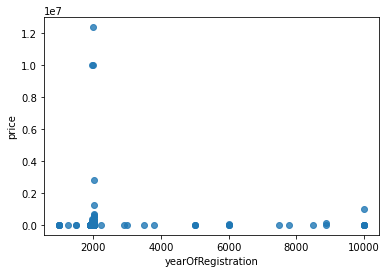

In [12]:
sns.regplot(x='yearOfRegistration', y='price', scatter=True, fit_reg=False, data=cars)
#working range 1950 to 2018

In [13]:
price_count=cars['price'].value_counts().sort_index()

C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

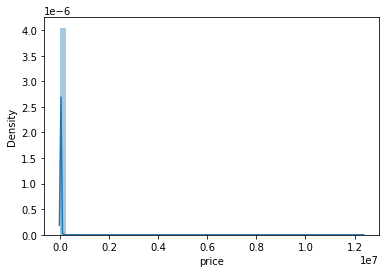

In [14]:
sns.distplot(cars['price'])

In [15]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

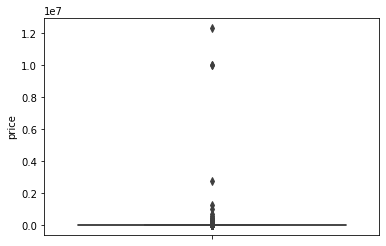

In [16]:
sns.boxplot(y=cars['price'])

In [17]:
sum(cars['price']>150000)

34

In [18]:
sum(cars['price']<100)
#working range 100 - 150000

1748

In [19]:
power_count=cars['powerPS'].value_counts().sort_index()

C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

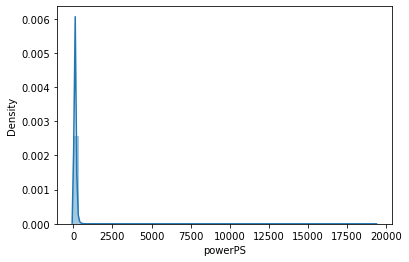

In [20]:
sns.distplot(cars['powerPS'])

In [21]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<AxesSubplot:ylabel='powerPS'>

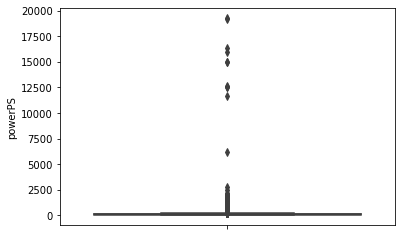

In [22]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='powerPS', ylabel='price'>

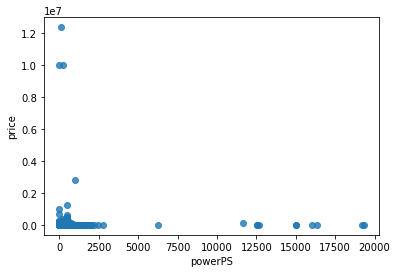

In [23]:
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)

In [24]:
print(sum(cars['powerPS']>500))
print(sum(cars['powerPS']<10))
#working range 10 to 500

115
5565


In [25]:
#working range of data
cars=cars[
    (cars.yearOfRegistration<=2018) 
    & (cars.yearOfRegistration>=1950)
    & (cars.price>=100)
    & (cars.price<=150000)
    & (cars.powerPS>=10)
    & (cars.powerPS<=500)]
#~6700 records are dropped

In [26]:
#combine yearOfRegistration and monthOfRegistration
cars['monthOfRegistration']/=12

In [27]:
#create new variable Age by adding yearOfRegistration and monthOfRegistration
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [28]:
#drop yearOfRegistration and monthOfRegistration from the dataframe
cars=cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'], axis=1)

C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

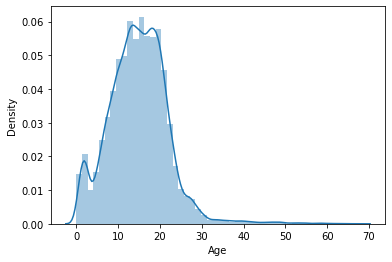

In [29]:
#visualize parameters
sns.distplot(cars['Age'])

<AxesSubplot:ylabel='Age'>

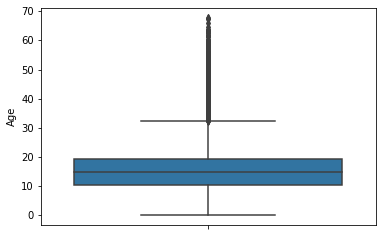

In [30]:
sns.boxplot(y=cars['Age'])

C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

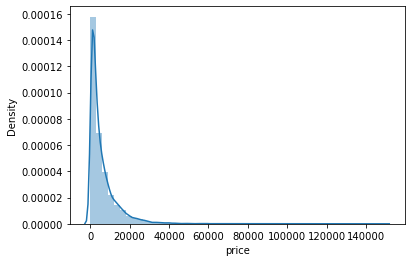

In [31]:
sns.distplot(cars['price'])

<AxesSubplot:ylabel='price'>

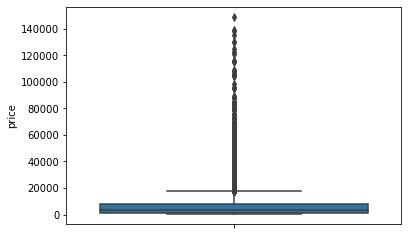

In [32]:
sns.boxplot(y=cars['price'])

C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

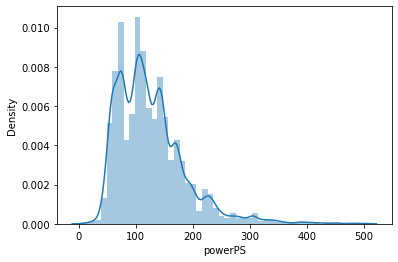

In [33]:
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='powerPS'>

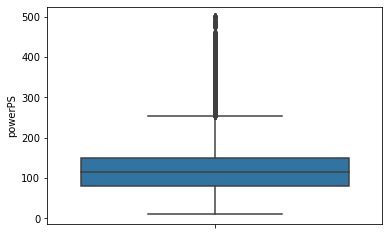

In [34]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='Age', ylabel='price'>

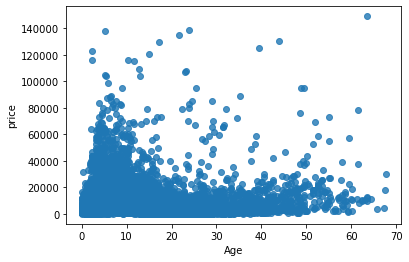

In [35]:
#Age vs Price
sns.regplot(x='Age', y='price', scatter=True, fit_reg=False, data=cars)
#cars priced higher for new cars
#with increase in age, price of cars decreased
#however some cars are priced higher with increase in age

<AxesSubplot:xlabel='powerPS', ylabel='price'>

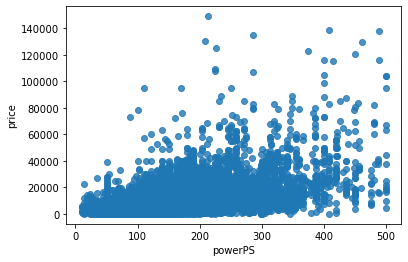

In [36]:
#powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)

private       42771
commercial        1
Name: seller, dtype: int64
col_0       count
seller           
commercial  0.000
private     1.000


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller', ylabel='count'>

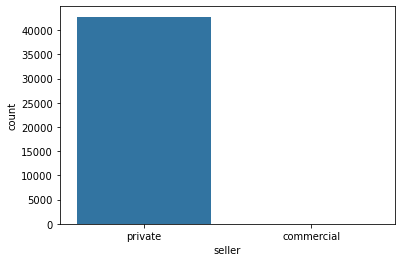

In [37]:
#seller variable
print(cars['seller'].value_counts())
print(pd.crosstab(cars['seller'], columns='count', normalize=True))
sns.countplot(cars['seller'])
#fewer cars have 'commercial' which is insignificant

offer    42772
Name: offerType, dtype: int64


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='offerType', ylabel='count'>

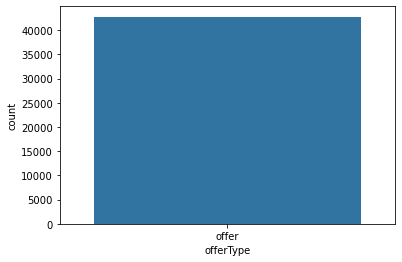

In [38]:
#variable offertype
print(cars['offerType'].value_counts())
sns.countplot(cars['offerType'])
#all cars have same offerType so this variable in insignificant

test       22128
control    20644
Name: abtest, dtype: int64
col_0    counts
abtest         
control   0.483
test      0.517


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='abtest', ylabel='count'>

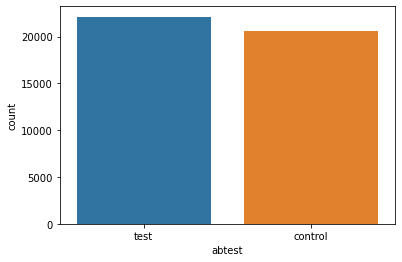

In [39]:
#variable abtest
print(cars['abtest'].value_counts())
print(pd.crosstab(cars['abtest'], columns='counts', normalize=True))
sns.countplot(cars['abtest'])
#equally distributed

<AxesSubplot:xlabel='abtest', ylabel='price'>

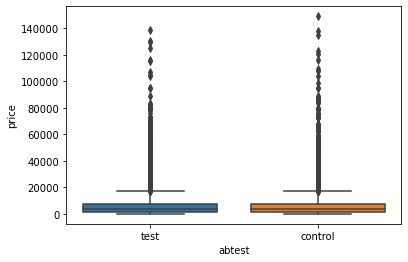

In [40]:
sns.boxplot(x='abtest', y='price', data=cars)
#for every price value there is almost 50-50 distribution
#does not affect price, so insignificant

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64
col_0          count
vehicleType         
bus            0.090
cabrio         0.070
coupe          0.057
limousine      0.294
others         0.008
small car      0.233
station wagon  0.202
suv            0.045


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

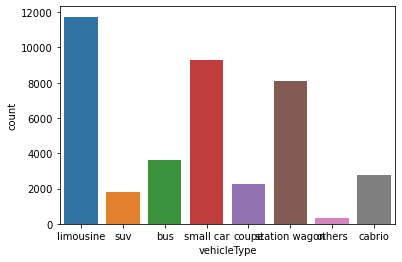

In [41]:
#variable vehicleType
print(cars['vehicleType'].value_counts())
print(pd.crosstab(cars['vehicleType'], columns='count', normalize=True))
sns.countplot(cars['vehicleType'])

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

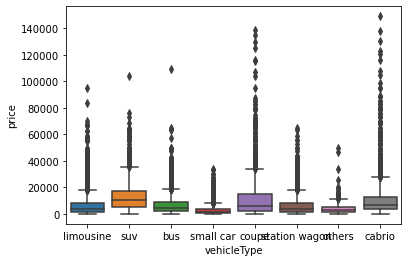

In [42]:
sns.boxplot(x='vehicleType', y='price', data=cars)
#vehicleType affect price

manual       32582
automatic     9396
Name: gearbox, dtype: int64
col_0      count
gearbox         
automatic  0.224
manual     0.776


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gearbox', ylabel='count'>

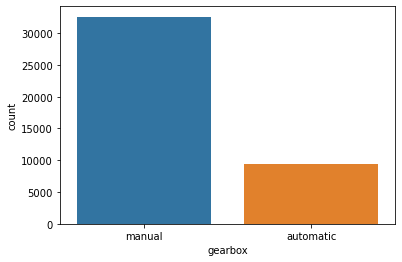

In [43]:
#gearbox variable
print(cars['gearbox'].value_counts())
print(pd.crosstab(cars['gearbox'], columns='count', normalize=True))
sns.countplot(cars['gearbox'])

<AxesSubplot:xlabel='gearbox', ylabel='price'>

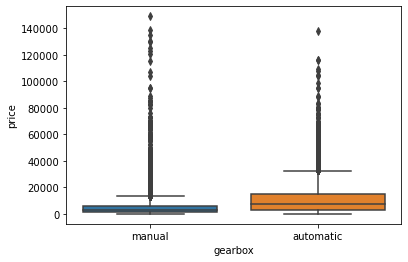

In [44]:
sns.boxplot(x='gearbox', y='price', data=cars)
#gearbox affect price

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
rangerover       1
serie_3          1
elefantino       1
b_max            1
serie_2          1
Name: model, Length: 247, dtype: int64
col_0    count
model         
100      0.001
145      0.000
147      0.001
156      0.002
159      0.000
...        ...
yaris    0.003
yeti     0.001
ypsilon  0.001
z_reihe  0.003
zafira   0.008

[247 rows x 1 columns]


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='count'>

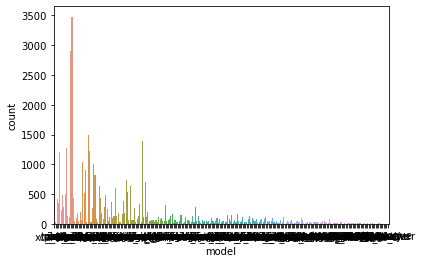

In [45]:
#variable model
print(cars['model'].value_counts())
print(pd.crosstab(cars['model'], columns='count', normalize=True))
sns.countplot(cars['model'])

<AxesSubplot:xlabel='model', ylabel='price'>

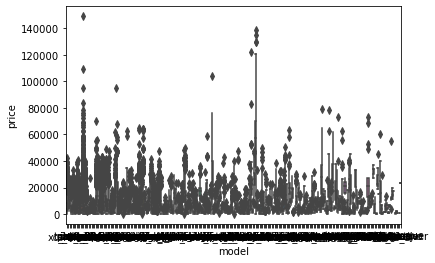

In [46]:
sns.boxplot(x='model', y='price', data=cars)
#cars are distributed over many models
#model variable consider in modelling

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64
col_0      count
kilometer       
5000       0.011
10000      0.005
20000      0.015
30000      0.017
40000      0.019
50000      0.022
60000      0.026
70000      0.028
80000      0.032
90000      0.035
100000     0.043
125000     0.107
150000     0.641


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kilometer', ylabel='count'>

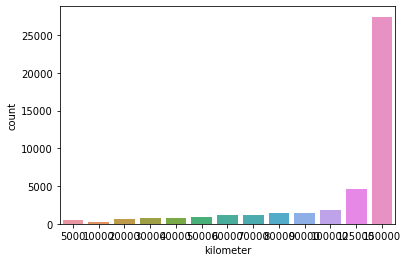

In [47]:
#variable kilometer
print(cars['kilometer'].value_counts().sort_index())
print(pd.crosstab(cars['kilometer'], columns='count', normalize=True))
sns.countplot(cars['kilometer'])

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64


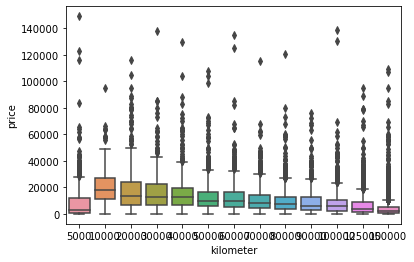

In [48]:
sns.boxplot(x='kilometer', y='price', data=cars)
print(cars['kilometer'].describe())

C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

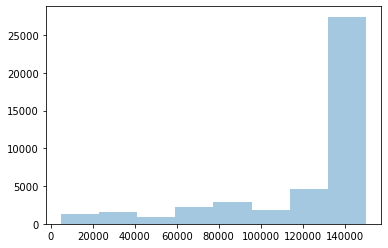

In [49]:
sns.distplot(x=cars['kilometer'], bins=8, kde=False)

<AxesSubplot:xlabel='kilometer', ylabel='price'>

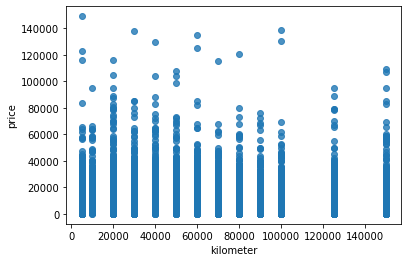

In [50]:
sns.regplot(x='kilometer', y='price', scatter=True, fit_reg=False, data=cars)
#variable kilometer is considered for modelling

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64
col_0     count
fuelType       
cng       0.002
diesel    0.320
electro   0.000
hybrid    0.001
lpg       0.017
other     0.000
petrol    0.660


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='count'>

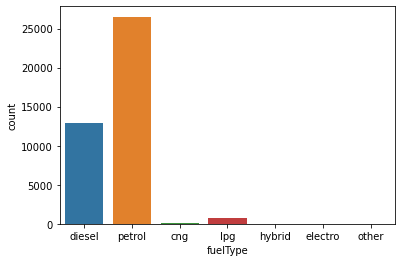

In [51]:
#variable fuelType
print(cars['fuelType'].value_counts())
print(pd.crosstab(cars['fuelType'], columns='count', normalize=True))
sns.countplot(cars['fuelType'])

<AxesSubplot:xlabel='fuelType', ylabel='price'>

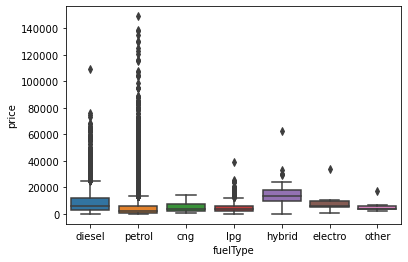

In [52]:
sns.boxplot(x='fuelType', y='price', data=cars)
#consider for modelling

In [53]:
#variable brand
print(cars['brand'].value_counts())
print(pd.crosstab(cars['brand'], columns='count', normalize=True))

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
daewoo              53
rover               53
trabant             43
lada                22
Name: brand, dtype: int64
col_0           count
brand                
alfa_romeo

C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand', ylabel='count'>

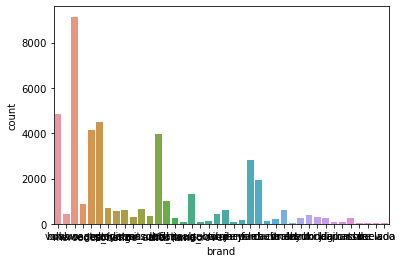

In [54]:
sns.countplot(cars['brand'])

<AxesSubplot:xlabel='brand', ylabel='price'>

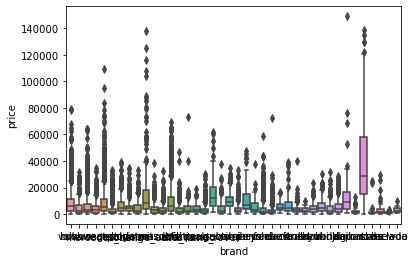

In [55]:
sns.boxplot(x='brand', y='price', data=cars)

<AxesSubplot:xlabel='brand', ylabel='price'>

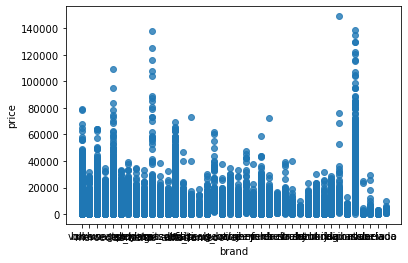

In [56]:
sns.regplot(x='brand', y='price', scatter=True, fit_reg=False, data=cars)
#consider for modelling

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64
col_0              count
notRepairedDamage       
no                 0.891
yes                0.109


C:\Users\v-pusalu\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

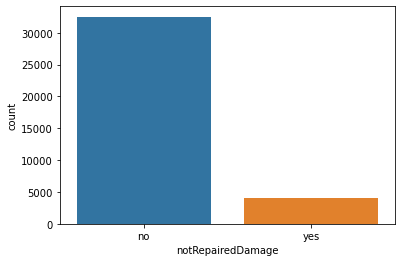

In [58]:
#variable notRepairedDamage
#yes- car is damaged but not rectified
#no - car was damaged but has been rectified
print(cars['notRepairedDamage'].value_counts())
print(pd.crosstab(cars['notRepairedDamage'], columns='count', normalize=True))
sns.countplot(cars['notRepairedDamage'])

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

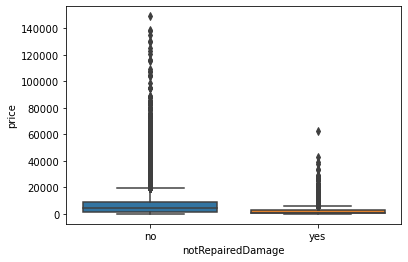

In [59]:
sns.boxplot(x='notRepairedDamage', y='price', data=cars)
#consider for modelling

In [60]:
#remove insignificant variables
cols=['seller', 'offerType', 'abtest']
cars=cars.drop(columns=cols, axis=1)
cars_copy=cars.copy()

In [61]:
#correlation
cars_select=cars_copy.select_dtypes(exclude=['object'])
corr=cars_select.corr()
round(corr,3)
print(corr)

           price  powerPS  kilometer    Age
price      1.000    0.575     -0.440 -0.336
powerPS    0.575    1.000     -0.016 -0.151
kilometer -0.440   -0.016      1.000  0.292
Age       -0.336   -0.151      0.292  1.000


In [62]:
#ommit missing values
cars_omit=cars.dropna(axis=0)

In [63]:
cars_omit.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
7,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920


In [65]:
#one-hot encoding
#converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit, drop_first=True)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [67]:
#model building
#separating input and output features
x1=cars_omit.drop(['price'], axis='columns', inplace=False)
y1=cars_omit['price']

array([[<AxesSubplot:title={'center':'1.Before'}>,
        <AxesSubplot:title={'center':'2.After'}>]], dtype=object)

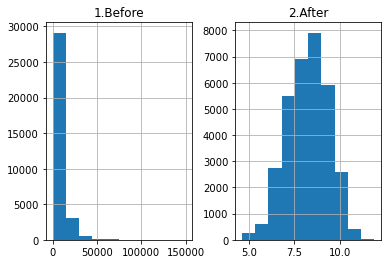

In [68]:
#Plotting the variable price
prices=pd.DataFrame({'1.Before':y1,'2.After':np.log(y1)})
prices.hist()

In [69]:
#Transforming price as a logarithmic value
y1=np.log(y1)

In [71]:
#splitting data into test and train
train_x,test_x,train_y,test_y=train_test_split(x1,y1,test_size=0.3, random_state=3)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [80]:
#Baseline model for ommitted data
#base line model is make by using test data mean value.
#this is to set a benchmark and to compare with our regression model

#finding the mean value for test data
base_pred=np.mean(test_y)
print(base_pred)

8.249615787653337


In [82]:
#repeating same value till length of test data
base_pred=np.repeat(base_pred, len(test_y))

array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

In [83]:
base_pred.shape

(9866,)

In [84]:
#finding the RMSE
base_root_mean_square_error=np.sqrt(mean_squared_error(test_y, base_pred))
print(base_root_mean_square_error)

1.1274483657478247


In [85]:
#Linear regression with ommitted data
#setting intercept as true
lgr=LinearRegression(fit_intercept=True)

In [86]:
#fit model
model=lgr.fit(train_x,train_y)

In [87]:
#predict model on test data
pred=lgr.predict(test_x)

In [88]:
#computing MSE and RMSE
lin_mse=mean_squared_error(test_y,pred)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

0.5455481266513815


In [89]:
#R squared values
r2_lin_test=model.score(test_x,test_y)
r2_lin_train=model.score(train_x,train_y)
print(r2_lin_test, r2_lin_train)

0.7658615091649266 0.7800936978183916


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64


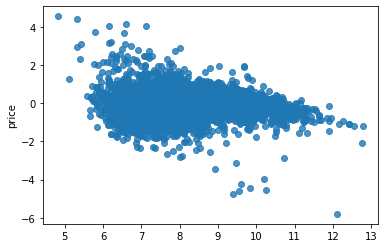

In [91]:
#Regression diagnostics-residual plot analysis
residuals=test_y-pred
sns.regplot(x=pred, y=residuals, scatter=True, fit_reg=False)
print(residuals.describe())
#values are close to zero which means that predicted and actual values are nearly same

In [96]:
#Random forest with omitted data
rf=RandomForestRegressor(n_estimators=100, max_features='auto', 
                        max_depth=100, min_samples_split=10, 
                        min_samples_leaf=4, random_state=1)

#model
model=rf.fit(train_x,train_y)

#predict 
pred=rf.predict(test_x)

#compute MSE and RMSE
rf_mse=mean_squared_error(test_y, pred)
rf_rmse=np.sqrt(rf_mse)
print(rf_rmse)

0.4360736289370223


In [97]:
#R squared value
r2_rf_test=model.score(test_x, test_y)
r2_rf_train=model.score(train_x,train_y)
print(r2_rf_test, r2_rf_train)

0.8504018147750623 0.9202494705146291


In [139]:
#model building with imputed data
cars_imputed=cars.apply(lambda x:x.fillna(x.median())\
                       if x.dtype=='float' else \
                       x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [140]:
#one-hot encoding
#converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed, drop_first=True)

In [141]:
#model building
#separating input and output features
x2=cars_imputed.drop(['price'], axis='columns', inplace=False)
y2=cars_imputed['price']

array([[<AxesSubplot:title={'center':'1.Before'}>,
        <AxesSubplot:title={'center':'2.After'}>]], dtype=object)

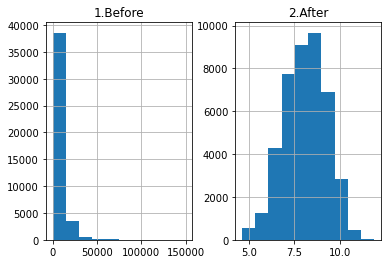

In [142]:
#Plotting the variable price
prices=pd.DataFrame({'1.Before':y2,'2.After':np.log(y2)})
prices.hist()

In [143]:
y2=np.log(y2)

In [144]:
#splitting data into test and train
train_x1,test_x1,train_y1,test_y1=train_test_split(x2,y2,test_size=0.3, random_state=3)
print(train_x1.shape,test_x1.shape,train_y1.shape,test_y1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [145]:
#Baseline model for ommitted data
#base line model is make by using test data mean value.
#this is to set a benchmark and to compare with our regression model

#finding the mean value for test data
base_pred=np.mean(test_y1)
print(base_pred)

8.068391740519193


In [146]:
#repeating same value till length of test data
base_pred=np.repeat(base_pred, len(test_y1))

In [147]:
#finding the RMSE
base_root_mean_square_error_imputed=np.sqrt(mean_squared_error(test_y1, base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


In [148]:
#Linear regression with ommitted data
#setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

In [149]:
model1=lgr2.fit(train_x1,train_y1)

In [150]:
pred1=lgr2.predict(test_x1)

In [151]:
#computing MSE and RMSE
lin_mse1=mean_squared_error(test_y1,pred1)
lin_rmse1=np.sqrt(lin_mse1)
print(lin_rmse1)

0.6483956449231307


In [152]:
#R squared values
r2_lin_test1=model1.score(test_x1,test_y1)
r2_lin_train1=model1.score(train_x1,train_y1)
print(r2_lin_test1, r2_lin_train1)

0.7023339008631175 0.7071658736894363


In [153]:
#Random forest with imputed data
rf1=RandomForestRegressor(n_estimators=100, max_features='auto', 
                        max_depth=100, min_samples_split=10, 
                        min_samples_leaf=4, random_state=1)

#model
model2=rf1.fit(train_x1,train_y1)

#predict 
pred2=rf1.predict(test_x1)

#compute MSE and RMSE
rf_mse2=mean_squared_error(test_y1, pred2)
rf_rmse2=np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


In [154]:
#R squared value
r2_rf1_test=model2.score(test_x1, test_y1)
r2_rf1_train=model2.score(train_x1,train_y1)
print(r2_rf1_test, r2_rf1_train)

0.8269964521311131 0.9024289431669166
